In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import phoebe as pb
from phoebe import u

In [2]:
logger = pb.logger()
b = pb.default_binary()

In [3]:
### loading, flattening, and removing outliers from omega Eri lightcurve (TESS)
TIC = 'TIC 244203955'
# search_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 5)
search_data = lk.search_lightcurve(TIC)[3]
lc1 = search_data.download()
# flat = lc.flatten() #check if should use normalize
# flat_rem = flat.remove_outliers()
norm_lc = lc1.normalize().remove_outliers()
norm_rem = norm_lc.bin(bins=520).remove_nans()
#need 500 data points to make it work, remove nans removes empty bins, 500 is optimal
lc = norm_rem

In [4]:
### defining units PHOEBE will accept, defining fluxes and times
watts_units = u.W / (u.m * u.m)
fluxes=lc['flux'] * watts_units
times = lc.time.to_value('btjd')
sigmas = lc['flux_err'] * watts_units

In [5]:
### adding lightcurve dataset
b.add_dataset('lc', fluxes=lc['flux']*watts_units, times=lc.time.to_value('btjd'), sigmas = lc['flux_err']*watts_units)

<ParameterSet: 80 parameters | contexts: figure, compute, constraint, dataset>

In [6]:
b.run_compute()

100%|████████████████████████████████████████| 494/494 [00:03<00:00, 127.37it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

/Users/skbowes/anaconda3/lib/python3.10/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


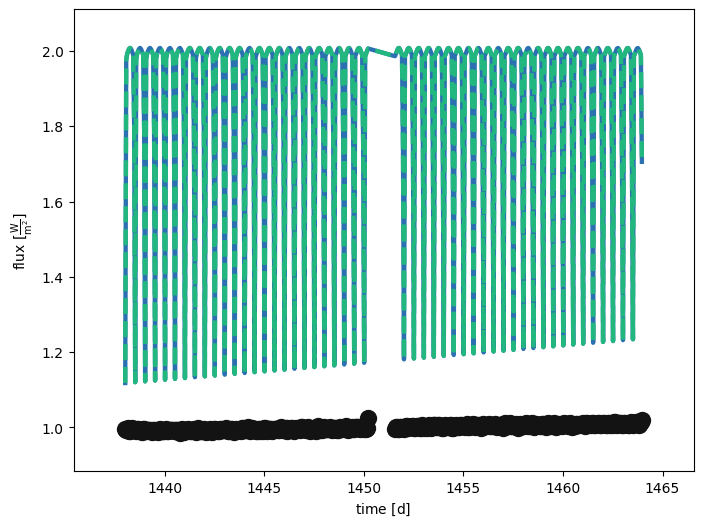

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [8]:
b.plot(show=True)

In [6]:
b.filter(component='primary', context='constraint')
b.get_parameter(qualifier='logg', component='primary', context='constraint')

<ConstraintParameter: {logg@primary@component} = log10((({mass@primary@component} / ({requiv@primary@component} ** 2.000000)) * 2942.206218) * 9.319541) (solar units) => 4.437551877570185>

In [7]:
# b.get_parameter(qualifier='logg', component='secondary', context='constraint')

In [8]:
print(b.get_parameter('logg@secondary@component'))
print(b.filter(qualifier='logg'))
# b.set_value("logg@secondary@component", value = 3.4)
print(b.get_parameter('logg@secondary@component'))

Parameter: logg@secondary@component
                       Qualifier: logg
                     Description: logg at requiv
                           Value: 4.437551877570185
                  Constrained by: mass@secondary@component, requiv@secondary@component
                      Constrains: None
                      Related to: mass@secondary@component, requiv@secondary@component

ParameterSet: 4 parameters
C          logg@primary@component: 4.437551877570185
C        logg@secondary@component: 4.437551877570185
          logg@primary@constraint: log10((({mass@primary@component} / ({requiv@primary@component} ** 2.000000)) * 2942.206218) * 9.319541)
        logg@secondary@constraint: log10((({mass@secondary@component} / ({requiv@secondary@component} ** 2.000000)) * 2942.206218) * 9.319541)
Parameter: logg@secondary@component
                       Qualifier: logg
                     Description: logg at requiv
                           Value: 4.437551877570185
                  C

In [10]:
""" set values """
# teff, requiv at prim or sec
# sma, period

b.set_value("per0@binary@orbit", value = 227)
# print(b["per0@binary@orbit"])
# #print(b.get_parameter("per0@binary@orbit"))
b.set_value("teff@primary@component", value=7244.4) #not sure if this is right
# print(b["teff@primary@component"])
# b.set_value('ecc@binary@orbit@component', value=0.46)
# print(b["sma@binary@component"])
# b.set_value("logg@primary@component", value = 3.4)

#### flip
# b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma') #its been flipped!

### dont flip for teff ratio, try without flipping
# b.flip_constraint('teffratio@binary@orbit', solve_for='teff@primary') 

""" we were here! try to get this running, with logg set (so it must be flipped)"""
# b.flip_constraint('logg@primary', solve_for="requiv@primary") #its been flipped!
b.flip_constraint('logg@secondary', solve_for="requiv@secondary")
# b.flip_constraint('requiv@primary', solve_for="mass@primary")



#it was here
b.set_value("logg@primary@component", value = 3.4)

In [11]:
b.set_value("logg@secondary@component", value = 3.4)
b.set_value('teffratio@binary@orbit@constraint', value = 1)

In [12]:
# print(b.filter(context='component'))
print(b.get_parameter('q@binary@component'))
print(b.get_parameter('mass@primary@component'))
print(b.get_parameter('mass@secondary@component'))
# mass @ binary, solver for q @ binary
#inclination , effective t, r equiv all have a big effect, so does sma

Parameter: q@binary@component
                       Qualifier: q
                     Description: Mass ratio
                           Value: 1.0
                  Constrained by: 
                      Constrains: mass@primary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component
                      Related to: sma@binary@component, period@binary@component, mass@primary@component, sma@primary@component, incl@binary@component, asini@primary@component, syncpar@primary@component, ecc@binary@component, incl@primary@component, long_an@primary@component, long_an@binary@component, requiv_max@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, syncpar@secondary@component, incl@secondary@component, long_an@secondary@component, requiv_max@secondary@component

Parameter: mass@primary@component
           

In [25]:
b.get_parameter('requiv@primary@star@constraint')
print(b.get_parameter('requivsumfrac@binary@orbit@constraint'))

ValueError: 0 results found for twig: 'requiv@primary@star@constraint', {'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [16]:
### add and run
b.add_solver('estimator.lc_geometry', solver= 'lc_geo', overwrite=True)
# b['analytical_model@lc_geo'] = 'two-gaussian' ##this throws up an error, requires additional arguments
b['analytical_model@lc_geo'] = 'polyfit'
print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# print(b.get_solver(solver='lc_geo'))
print(b.run_checks())
b.run_solver(solver = 'lc_geo', solution = 'lc_geo_sol', kind='lc_geometry', overwrite=True)

### see if flipping should go here
b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma') #its been flipped
b.flip_constraint('requiv@primary@star', solve_for='logg') #its been flipped
#try mass flip q

#### adopt
b.adopt_solution('lc_geo_sol')

Parameter: requivsumfrac@binary@component
                       Qualifier: requivsumfrac
                     Description: sum of fractional equivalent radii of children stars
                           Value: 0.618251610951154
                  Constrained by: 
                      Constrains: requivratio@binary@component
                      Related to: requiv@secondary@component, requiv@primary@component, requivratio@binary@component



<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power


<ParameterSet: 24 parameters | contexts: dataset, component>

In [9]:
# print(b.get_value('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@component'))
# print(b.get_parameter('teffratio@binary@orbit@constraint'))
# b.flip_constraint('teffratio@binary@orbit', solve_for='teff@primary') seconda

# print(b.get_value('requivsumfrac@binary@orbit@component'))
# print(b.get_parameter('requivsumfrac@binary@orbit@component'))
# # print(b.get_parameter('requivsumfrac@binary@orbit@constraint'))
# # b.flip_constraint('requivsumfrac@binary@orbit', solve_for='sma')

# b.add_solver('estimator.rv_geometry', solver='rv_geo', overwrite=True)
# print(b.filter(solver='rv_geo_sol'))
# b.run_solver('rv_geo', solution='rv_geo_sol')
# # print(b.filter(solution='rv_geo_sol'))

# pb.list_available_solvers(devel=False)

In [17]:
b.add_solver('estimator.lc_periodogram', solver= 'lc_periodo', overwrite=True)
b.run_solver(solver= 'lc_periodo', solution = 'periodo_sol', kind='lc_periodogram', overwrite=True)
# print(b.get_solution('periodo_sol'))
b.adopt_solution('periodo_sol')

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<ParameterSet: 15 parameters | contexts: dataset, component>

In [18]:
### add and run
b.add_solver('estimator.ebai', solver='ebaiest', ebai_method = 'mlp', overwrite=True)
b['phase_bin@ebaiest@solver'] = False
print(b['ebaiest'])
#mlp
b.run_solver(solver='ebaiest', solution= "ebaiest_sol",kind='ebai', overwrite=True)

### flip
# b.get_parameter("esinw@binary@orbit")
# b.get_parameter("ecosw@binary@orbit@constraint")
b.flip_constraint("esinw@binary@orbit", solve_for='ecc')
b.flip_constraint("ecosw@binary@orbit", solve_for='per0')
### flip back to default for lc estimator ?
# print(b['ebaiest'])

### adopt
b.adopt_solution('ebaiest_sol')

ParameterSet: 6 parameters
          comments@ebaiest@solver: 
        use_server@ebaiest@solver: none
       lc_datasets@ebaiest@solver: ['*']
         phase_bin@ebaiest@solver: False
       ebai_method@ebaiest@solver: mlp
             orbit@ebaiest@solver: binary


<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarning: overflow encountered in scalar power
<string>:1: RuntimeWarnin

<ParameterSet: 27 parameters | contexts: dataset, component>

In [19]:
# b.flip_constraint("ecc", solve_for='esinw@binary@orbit')
# b.flip_constraint("per0", solve_for='ecosw@binary@orbit')

In [20]:
print(b.filter(component='primary', context='component'))

ParameterSet: 21 parameters
         requiv@primary@component: 1.192172915506103e+118 solRad
C    requiv_max@primary@component: 9.09472514741124e+118 solRad
           teff@primary@component: 7244.4 K
           abun@primary@component: 0.0
C          logg@primary@component: 3.4
        syncpar@primary@component: 1.0
C        period@primary@component: 0.27534654156941996 d
C          freq@primary@component: 22.819189825981134 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 86.02940433413958 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: inf solMass
C           sma@primary@component: 1.2453966933550357e+119 solRad
C         asini@p

In [21]:
### treats sun as a blackbody
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')
b['atm@secondary@compute'] = 'blackbody'
b['atm@primary@compute'] = 'blackbody'
b.set_value('pblum_mode', 'dataset-scaled')

### resets
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b['atm@secondary@compute'] = 'ck2004'
b['atm@primary@compute'] = 'ck2004'
b.set_value('pblum_mode', 'decoupled') #check the default is decoupled

### WARNING Atmosphere parameters out of bounds: ldatm=ck2004, teff=[7339.76135311], logg=[7.34496037], abun=[0.]
### mass@primary@component: 807.0356768836715 solMass
### expected logg = 3-4, high 3 to low 4

In [22]:
# print(b.filter())
# print(b.get_parameter('ld_mode_bol@primary', context='component'))
# print(b.get_parameter('atm@secondary', context='compute'))
# print(b.get_parameter('pblum_mode', context='dataset'))
# b.filter(context='system')

In [23]:
#set values before you run the solver
b.run_compute()
# ERROR: constraints ['logg@primary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

Fri, 26 May 2023 11:41 BUNDLE       WARNING constraints ['logg@primary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


ValueError: failed to pass checks
Run Checks Report: FAIL
ERROR: constraints ['logg@primary@star@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

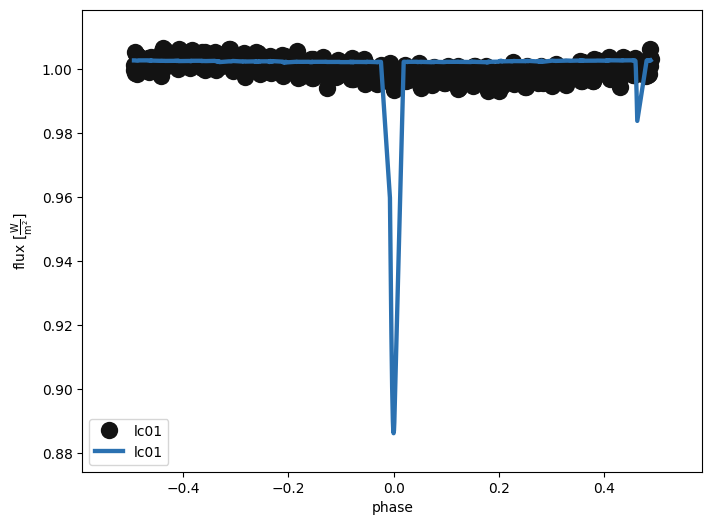

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [17]:
### blue is synthetic, black is data
b.plot(x='phases', legend=True, show=True)
# plt.show()

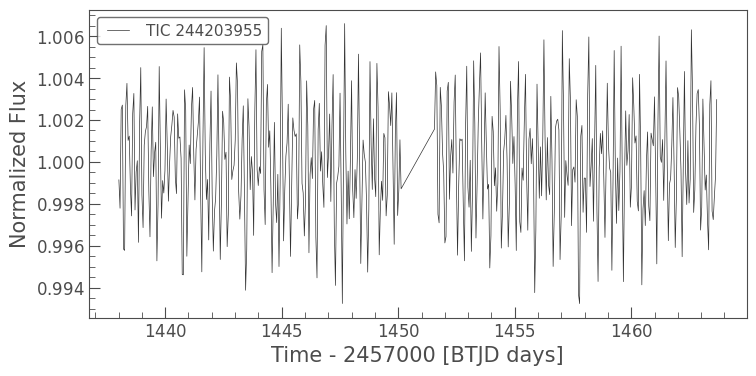

In [18]:
lc.plot()
plt.show()

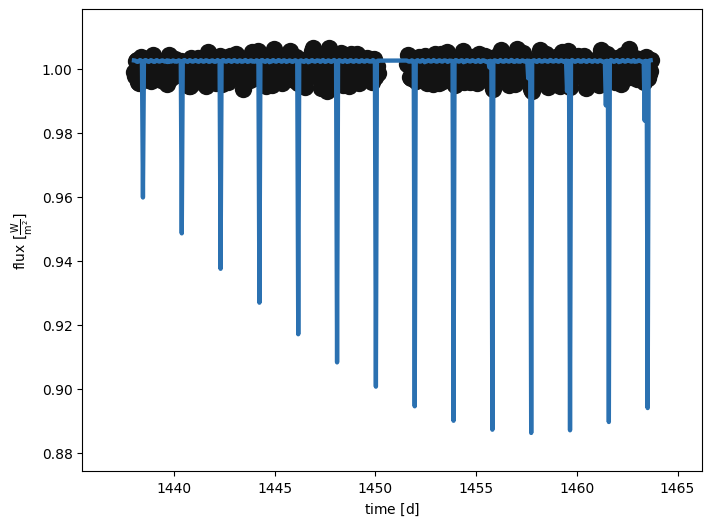

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [19]:
b.plot(show=True)

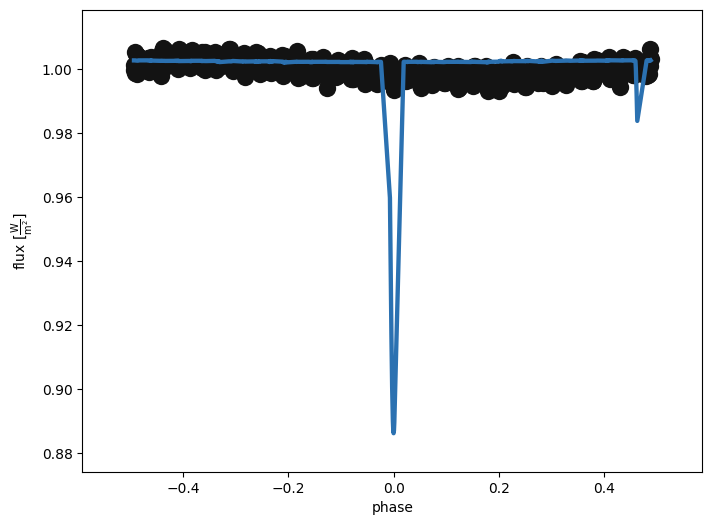

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [20]:
### plotting the lightcurve for one cycle 
b.plot(x='phase', show=True)

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

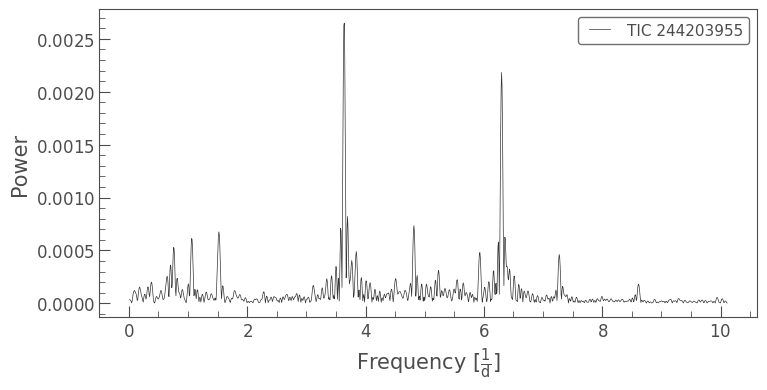

In [21]:
lombscargle = lc.to_periodogram(method='lombscargle')
lombscargle.plot()
# peaks near 3.6, 6.4

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      244203955      
          default_view      frequency      
                 label  TIC 244203955      
             ls_method           fast      
frequency_at_max_power         3.6411 1 / d
             max_power         0.0026      
               nyquist        10.1161 1 / d
   period_at_max_power         0.2746     d
             frequency  array (1297,) 1 / d
                period  array (1297,)     d
                 power  array (1297,)      
                  meta <class 'dict'>      
None
lightkurve.Periodogram properties:
        Attribute                   Description            Units
------------------------- -------------------------------- -----
                 targetid                        244203955      
             default_view                           period      
     

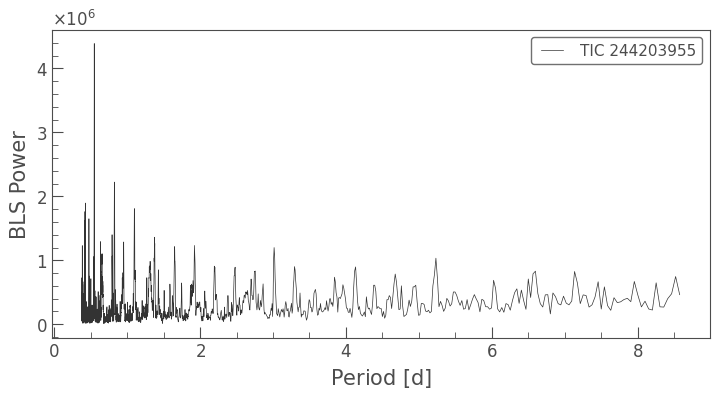

In [22]:
bls = lc.to_periodogram(method='bls')
bls.plot()
# peaks near 0.5
binned_periodo = bls.bin()

print(lombscargle.show_properties())
print(bls.show_properties())